In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import os
import collections
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
!pip3 install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/My Drive/Nalaiyathiran/rainfall in india 1901-2015.csv')

In [4]:
df1=pd.read_csv('/content/drive/My Drive/Nalaiyathiran/district wise rainfall normal.csv')

In [5]:
df2=pd.read_csv('/content/drive/My Drive/Nalaiyathiran/weather.csv')

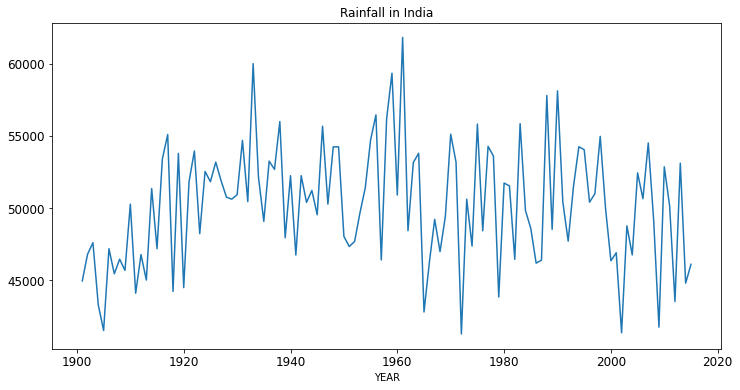

In [6]:
(df.groupby(by='YEAR')[['ANNUAL']]
 .sum()
 .plot(figsize=(12, 6), title='Rainfall in India', fontsize=12, legend=False))

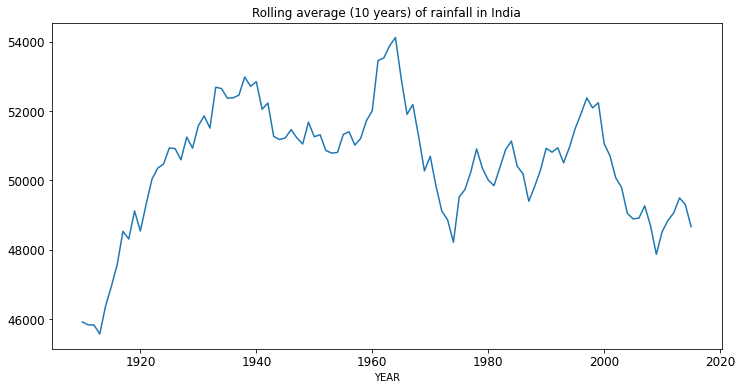

In [7]:
(df.groupby(by='YEAR')[['ANNUAL']]
 .sum()
 .rolling(10)
 .mean()
 .plot(figsize=(12, 6), title='Rolling average (10 years) of rainfall in India', fontsize=12, legend=False)
)

Text(0, 0.5, 'Rainfall (in mm)')

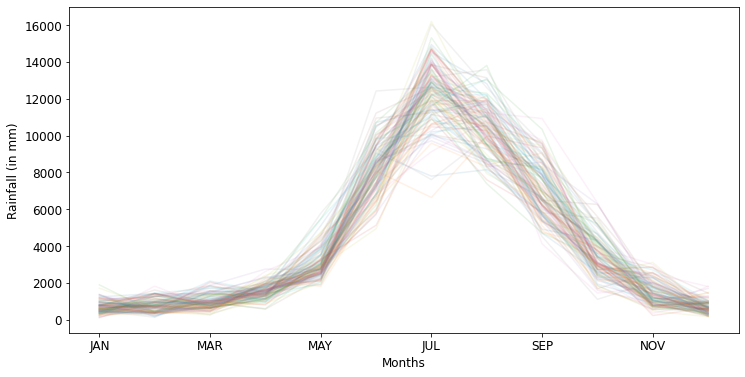

In [8]:
drop_col = ['ANNUAL','Jan-Feb','Mar-May','Jun-Sep','Oct-Dec']

fig, ax = plt.subplots()

(df.groupby(by='YEAR')
 .sum()
 .drop(drop_col, axis=1)
 .T
 .plot(alpha=0.1, figsize=(12, 6), legend=False, fontsize=12, ax=ax)
)

ax.set_xlabel('Months', fontsize=12)
ax.set_ylabel('Rainfall (in mm)', fontsize=12)

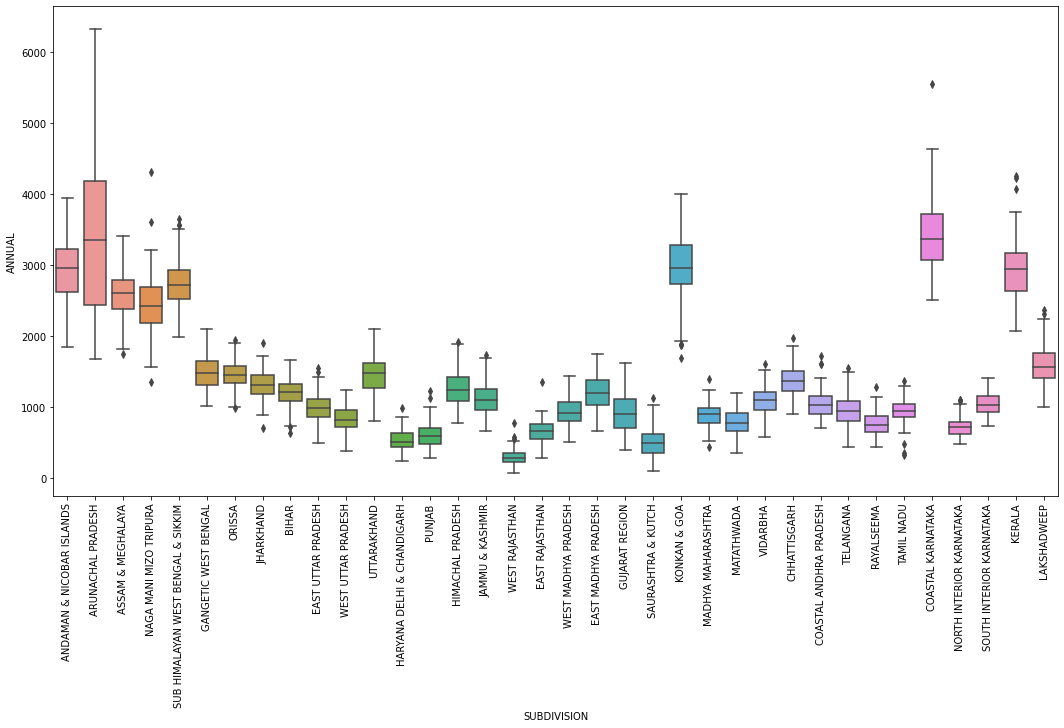

In [9]:
fig = plt.figure(figsize=(18, 9))
plt.xticks(rotation='vertical')
sns.boxplot(x='SUBDIVISION', y='ANNUAL', data=df)

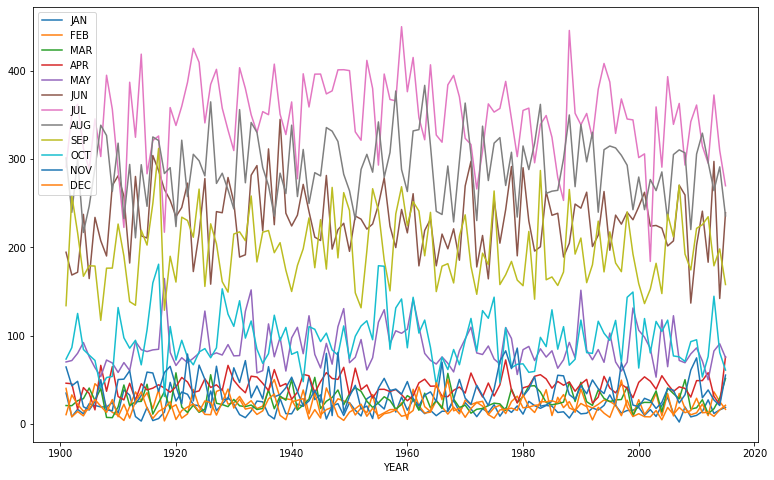

In [10]:
ax=df[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("YEAR").mean().plot(figsize=(13,8))

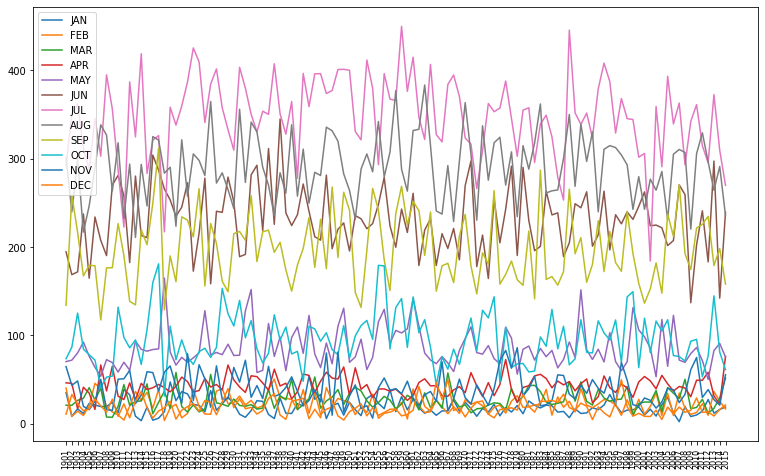

In [11]:
Z = df[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP', 'OCT', 'NOV', 'DEC']].sort_values('YEAR').groupby("YEAR").mean().reset_index()
ax = Z[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP', 'OCT', 'NOV', 'DEC']].plot(figsize=(13,8))
YL = df.sort_values('YEAR')["YEAR"].unique().tolist()
plt.xticks(range(0,115), YL, fontsize=8, rotation=90)
plt.show()

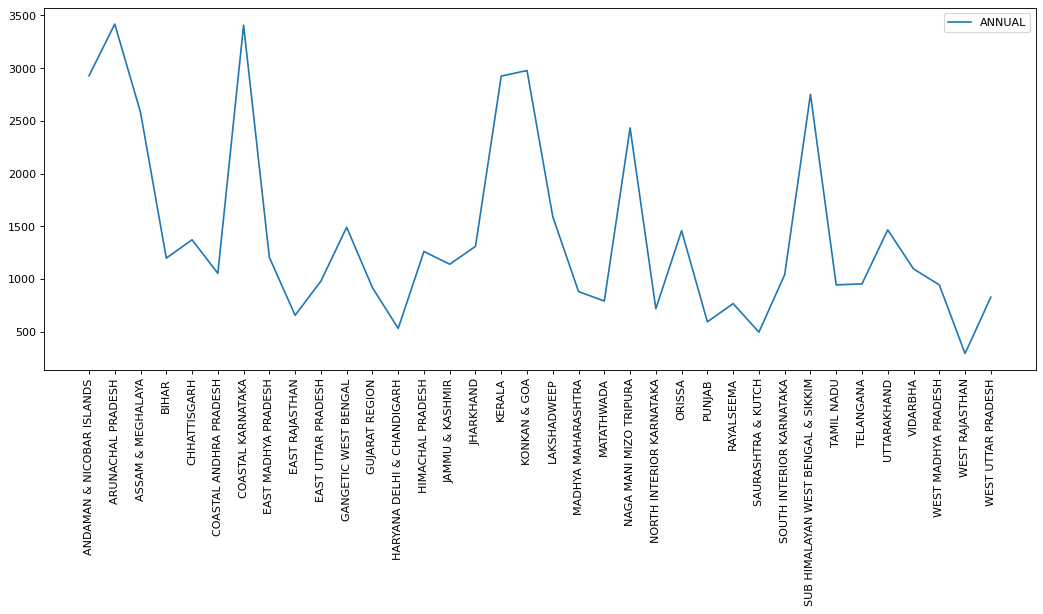

In [12]:
X = df.groupby('SUBDIVISION').mean()
plt.figure(figsize=(16,6),dpi=80)
plt.xticks(rotation=90)
plt.plot(X['ANNUAL'],label='ANNUAL')
plt.legend(loc='best')

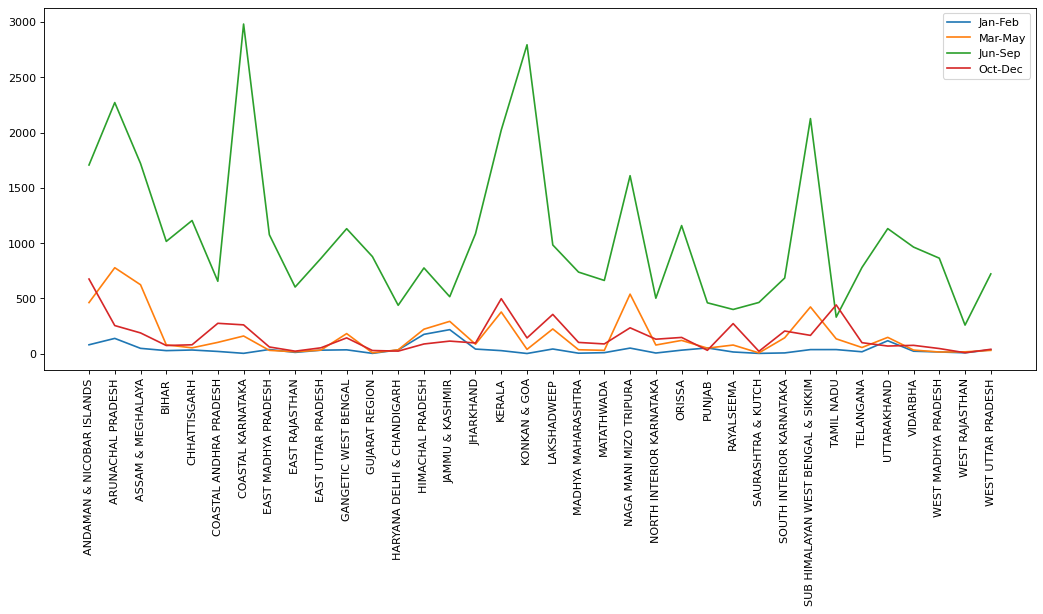

In [13]:
plt.figure(figsize=(16,6),dpi=80)
plt.xticks(rotation=90)
plt.plot(X['Jan-Feb'],label='Jan-Feb')
plt.plot(X['Mar-May'],label='Mar-May')
plt.plot(X['Jun-Sep'],label='Jun-Sep')
plt.plot(X['Oct-Dec'],label='Oct-Dec')
plt.legend(loc='best')

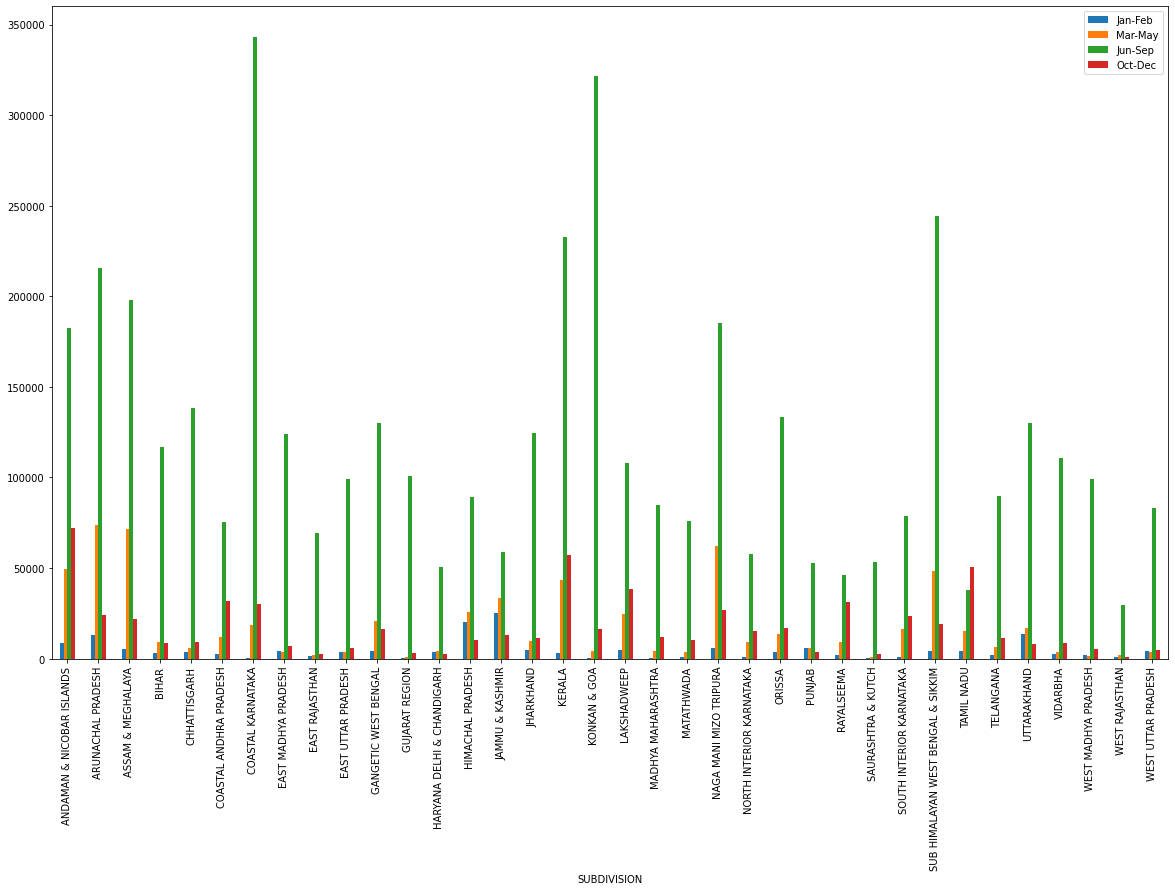

In [14]:
ax = df[['SUBDIVISION', 'Jan-Feb', 'Mar-May','Jun-Sep', 'Oct-Dec']].groupby("SUBDIVISION").sum().plot.bar(stacked=False,figsize=(20,12))

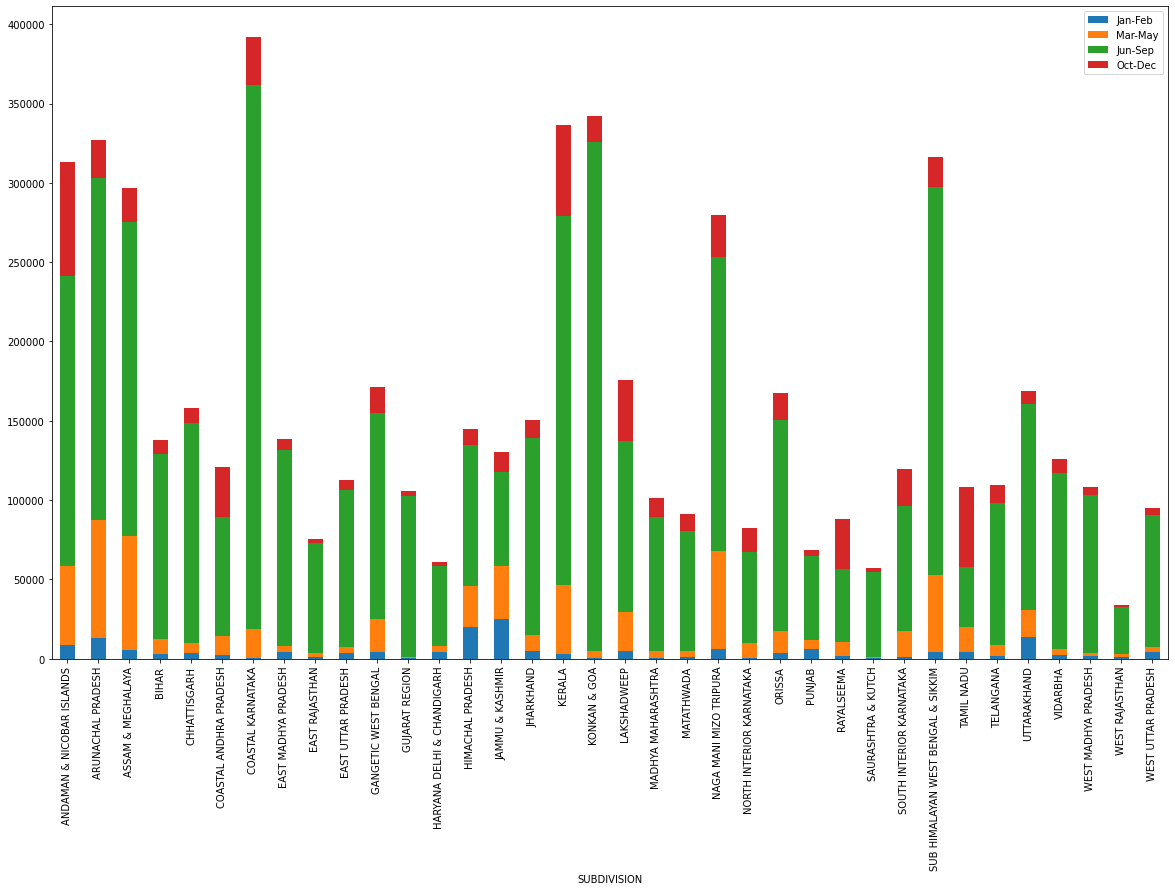

In [15]:
ax = df[['SUBDIVISION', 'Jan-Feb', 'Mar-May','Jun-Sep', 'Oct-Dec']].groupby("SUBDIVISION").sum().plot.bar(stacked=True,figsize=(20,12))

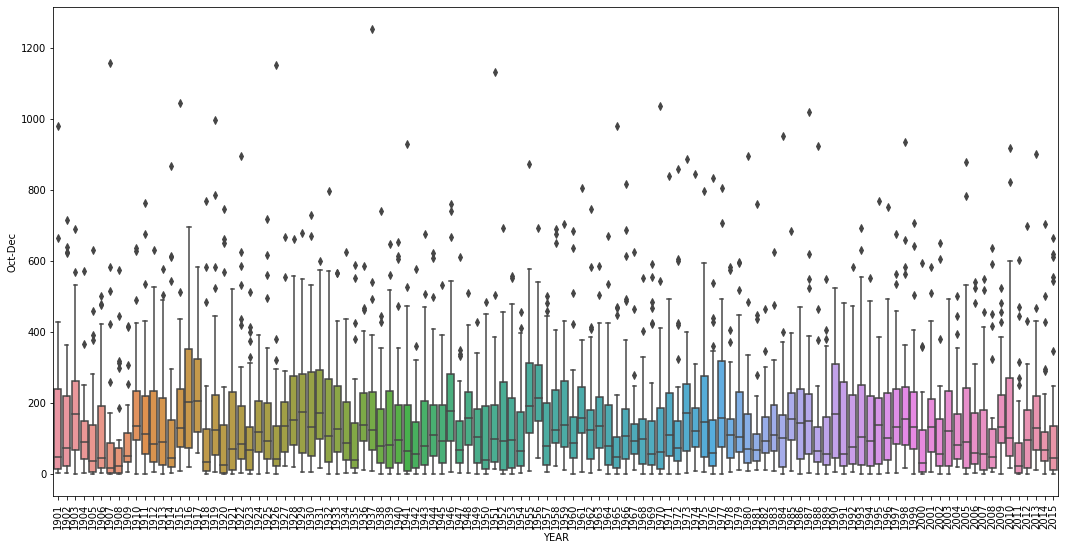

In [16]:
fig = plt.figure(figsize=(18, 9))
plt.xticks(rotation='vertical')
sns.boxplot(x='YEAR', y='Oct-Dec', data=df)

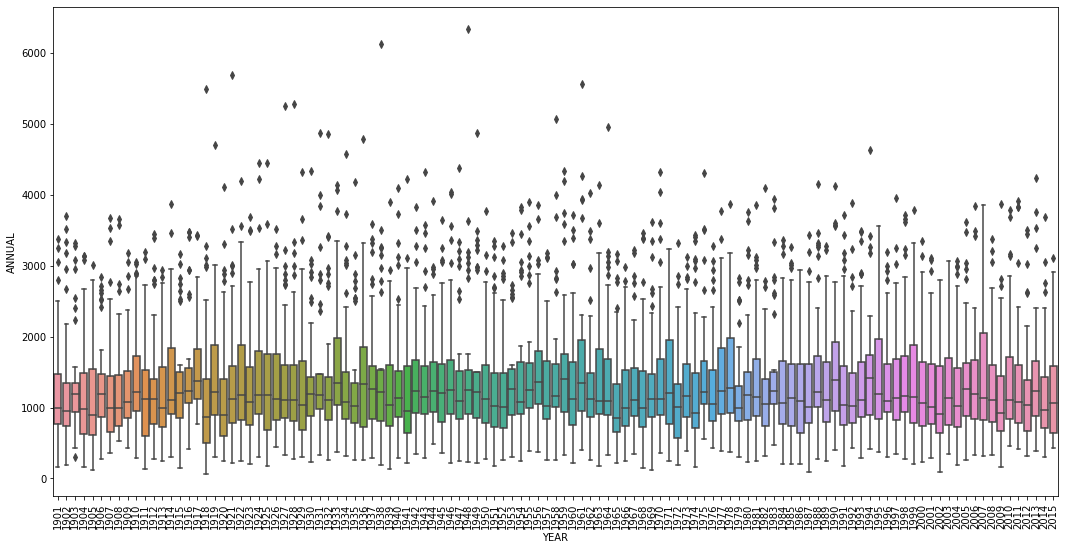

In [17]:
fig = plt.figure(figsize=(18, 9))
plt.xticks(rotation='vertical')
sns.boxplot(x='YEAR', y='ANNUAL', data=df)

In [18]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

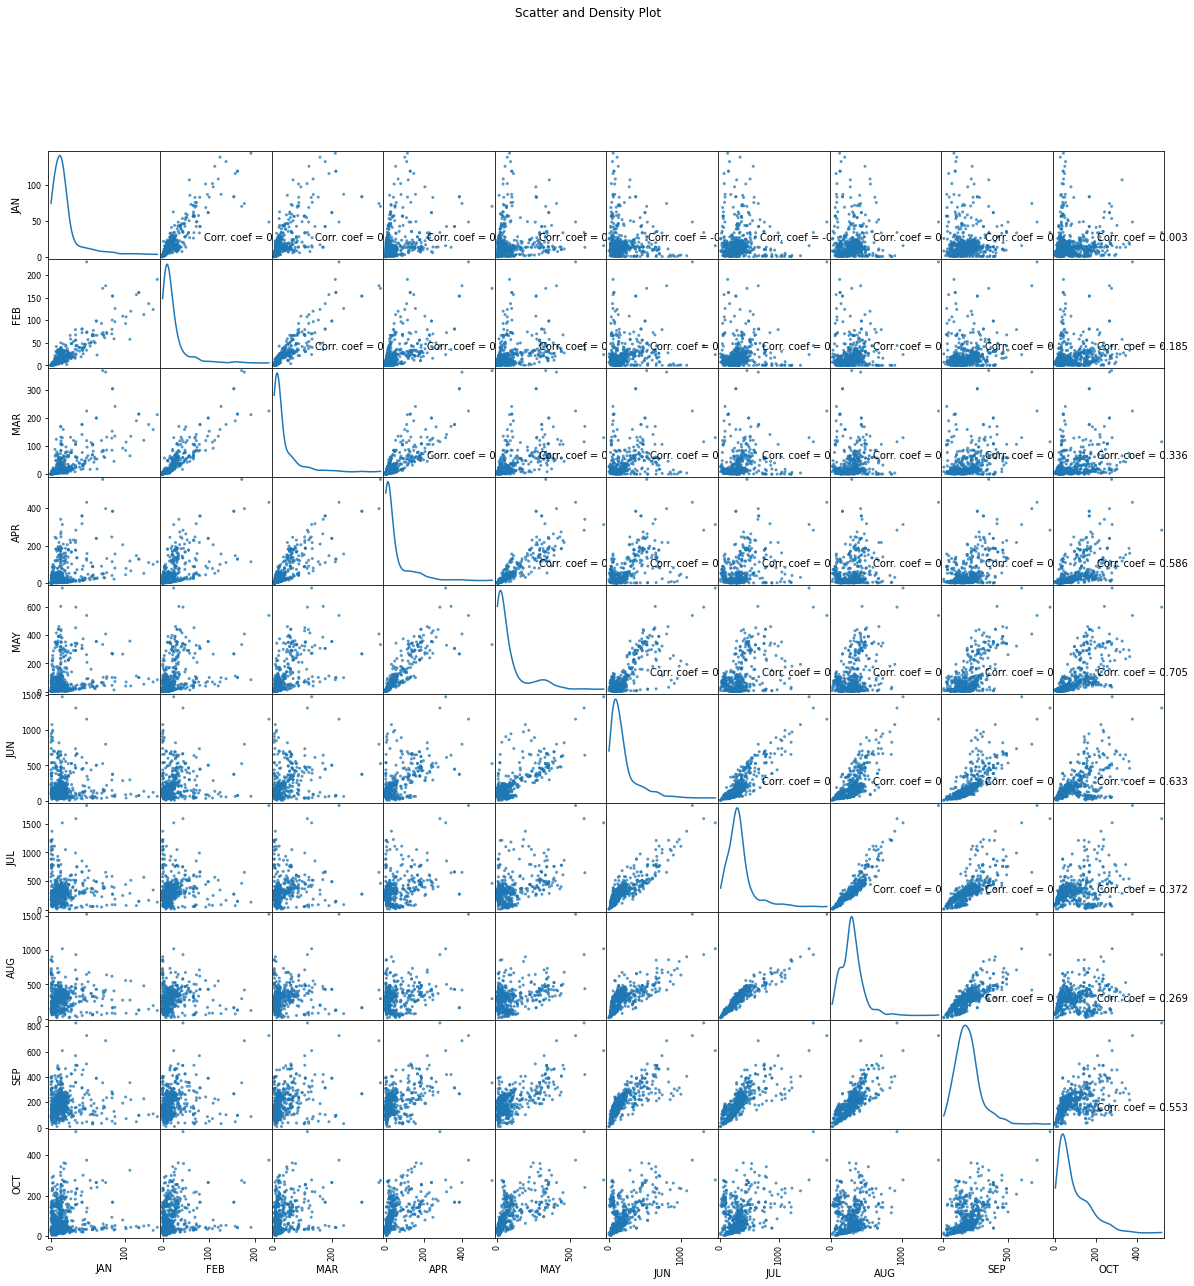

In [19]:
plotScatterMatrix(df1, 20, 10)

In [20]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

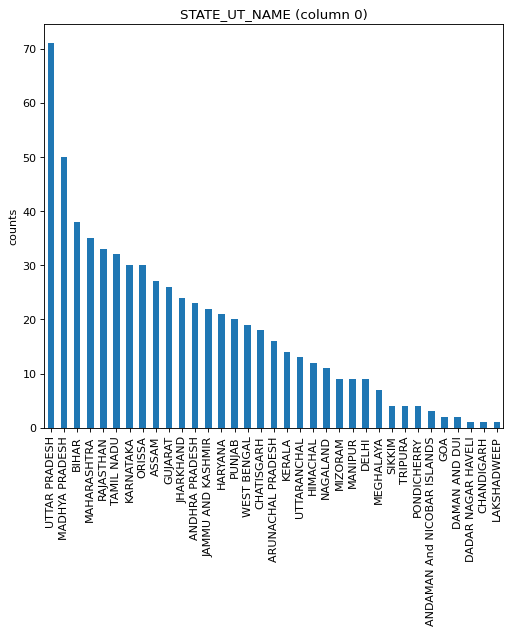

In [21]:
plotPerColumnDistribution(df1, 10, 5)

In [22]:
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [23]:
nRowsRead = 1000 # specify 'None' if want to read whole file
df1 = pd.read_csv('/content/drive/My Drive/Nalaiyathiran/district wise rainfall normal.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'district wise rainfall normal.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 641 rows and 19 columns


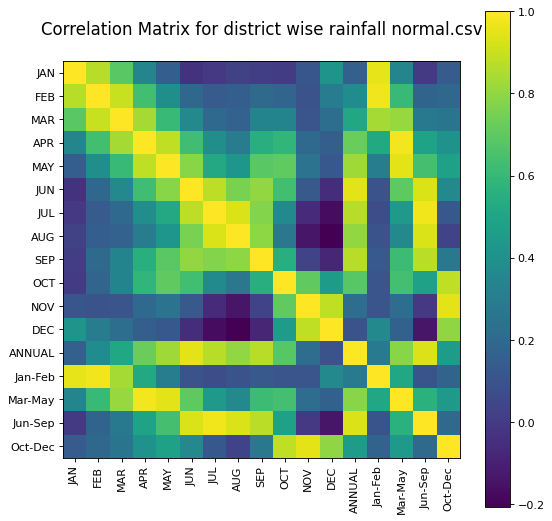

In [25]:
plotCorrelationMatrix(df1, 8)

In [26]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# rainfall in india 1901-2015.csv has 4116 rows in reality, but we are only loading/previewing the first 1000 rows
df = pd.read_csv('/content/drive/My Drive/Nalaiyathiran/rainfall in india 1901-2015.csv', delimiter=',', nrows = nRowsRead)
df.dataframeName = 'rainfall in india 1901-2015.csv'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 19 columns


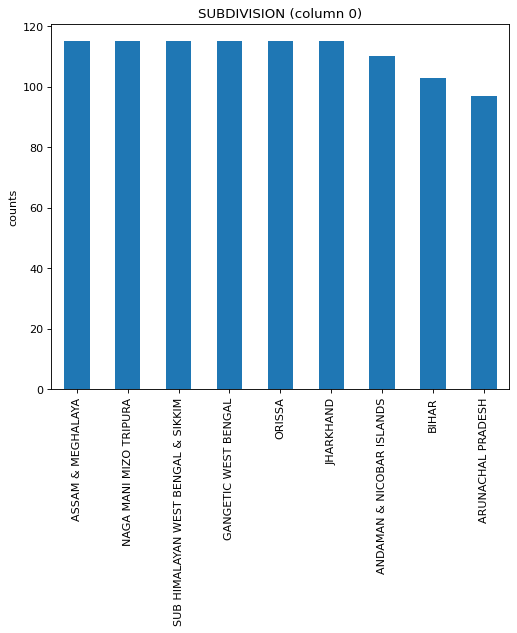

In [27]:
plotPerColumnDistribution(df, 10, 5)

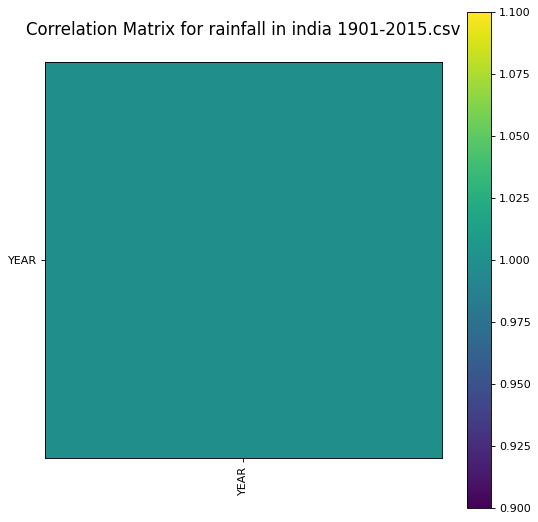

In [28]:
plotCorrelationMatrix(df, 8)

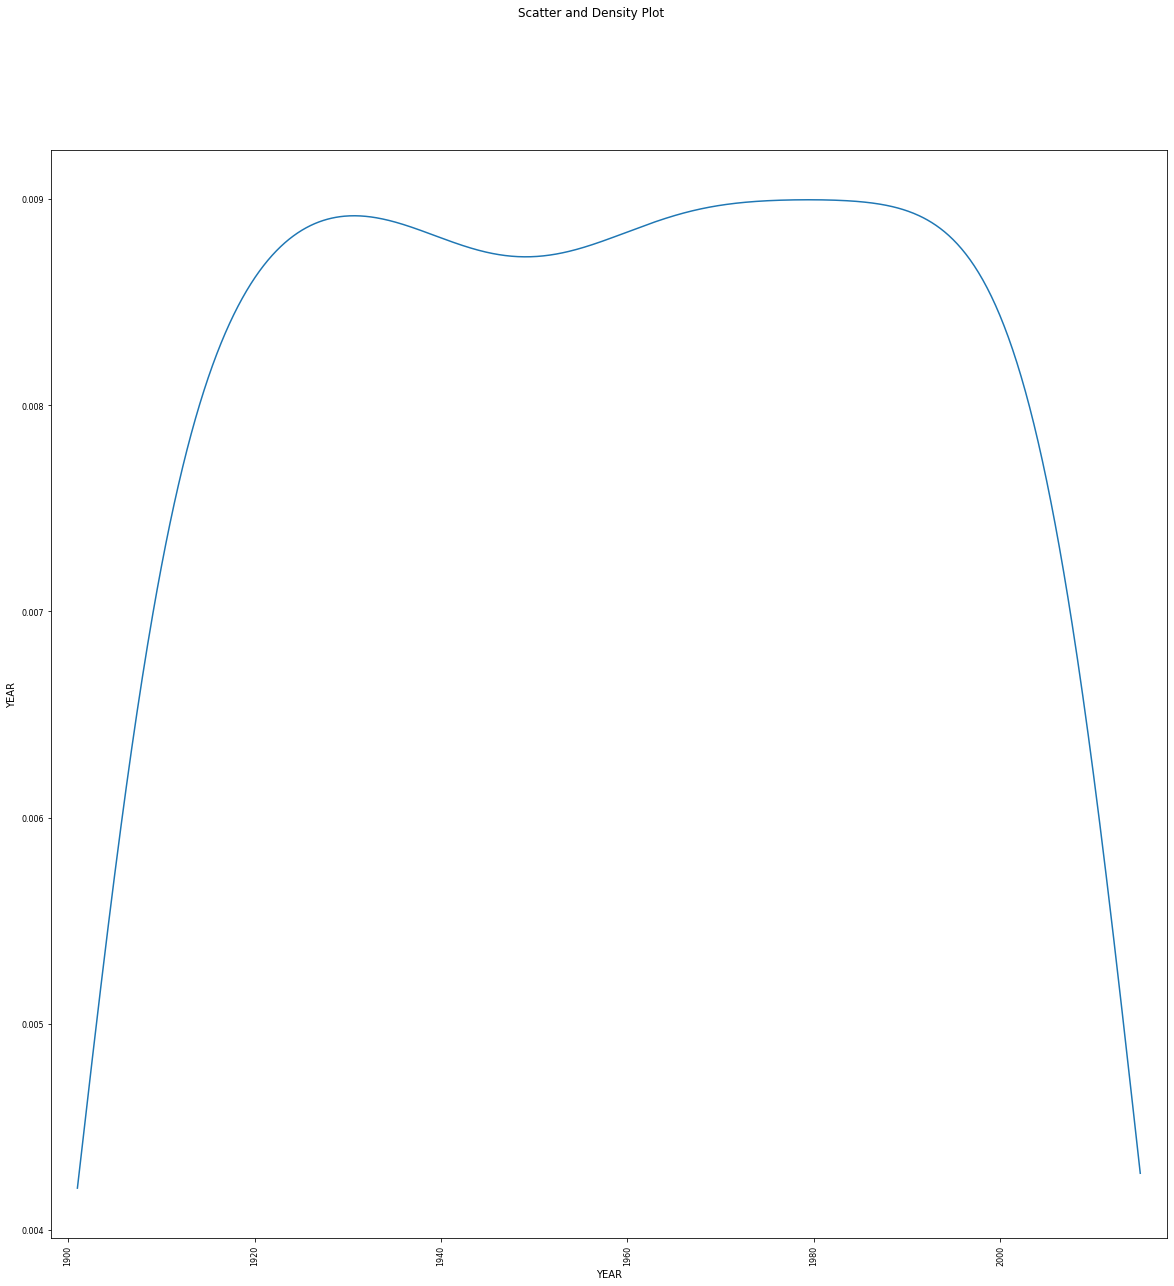

In [29]:
plotScatterMatrix(df, 20, 10)


In [30]:
df2.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
MinTemp,1.000000,0.752471,0.201939,0.649930,0.035711,0.218020,0.127542,-0.065922,-0.207897,-0.040709,-0.501707,-0.498007,0.215776,0.118397,0.916745,0.722730,0.218551
MaxTemp,0.752471,1.000000,-0.073560,0.690026,0.452064,0.109672,-0.216814,-0.167873,-0.359602,-0.533327,-0.290883,-0.379394,-0.175730,-0.135991,0.870604,0.989261,0.027557
Rainfall,0.201939,-0.073560,1.000000,-0.007293,-0.150990,0.096190,0.219637,0.056008,0.150109,0.289013,-0.331581,-0.250218,0.180046,0.127792,0.077299,-0.087493,0.089860
Evaporation,0.649930,0.690026,-0.007293,1.000000,0.318025,0.288477,0.068929,0.048601,-0.519587,-0.391780,-0.381906,-0.391093,-0.106007,-0.100045,0.707676,0.671632,0.076762
Sunshine,0.035711,0.452064,-0.150990,0.318025,1.000000,0.095843,-0.064522,0.072573,-0.499017,-0.759429,0.006276,-0.036201,-0.681092,-0.661131,0.219509,0.470447,-0.378823
WindGustSpeed,0.218020,0.109672,0.096190,0.288477,0.095843,1.000000,0.527653,0.693945,-0.349793,-0.069439,-0.540180,-0.526885,-0.012666,0.050230,0.256223,0.072501,0.251991
WindSpeed9am,0.127542,-0.216814,0.219637,0.068929,-0.064522,0.527653,1.000000,0.472966,-0.270623,0.146657,-0.356332,-0.247952,0.101842,-0.022471,0.064074,-0.235186,0.039091
WindSpeed3pm,-0.065922,-0.167873,0.056008,0.048601,0.072573,0.693945,0.472966,1.000000,-0.266092,-0.026368,-0.359800,-0.337325,-0.026426,0.007207,-0.017766,-0.187570,-0.009447
Humidity9am,-0.207897,-0.359602,0.150109,-0.519587,-0.499017,-0.349793,-0.270623,-0.266092,1.000000,0.546718,0.135727,0.134420,0.392842,0.271938,-0.436551,-0.355119,0.165931
Humidity3pm,-0.040709,-0.533327,0.289013,-0.391780,-0.759429,-0.069439,0.146657,-0.026368,0.546718,1.000000,-0.087946,-0.010052,0.551633,0.510108,-0.255681,-0.581676,0.358752


In [31]:
cor=df2.corr()

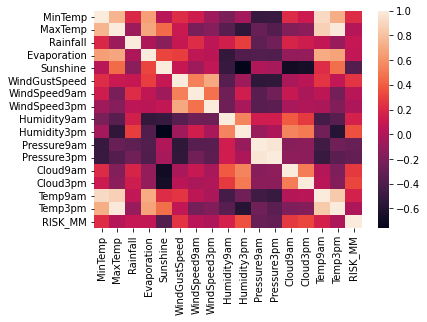

In [32]:
sns.heatmap(data=cor,xticklabels=cor.columns.values,yticklabels=cor.columns.values)

In [34]:
sns.pairplot(df2)

Output hidden; open in https://colab.research.google.com to view.

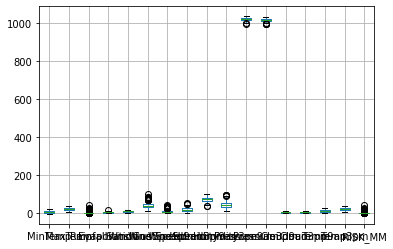

In [36]:
df2.boxplot()

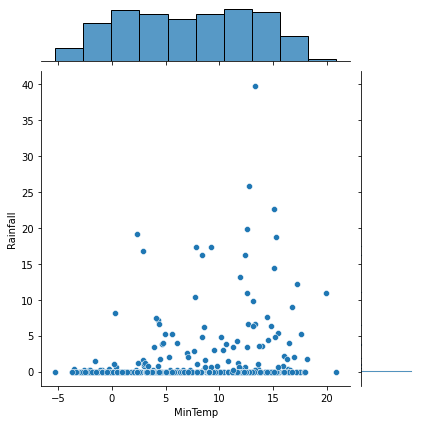

In [37]:
sns.jointplot(df2['MinTemp'],df2['Rainfall'])

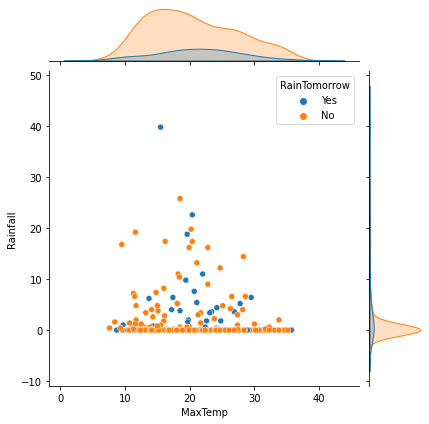

In [38]:
sns.jointplot(df2['MaxTemp'],df2['Rainfall'],hue=df2['RainTomorrow'])

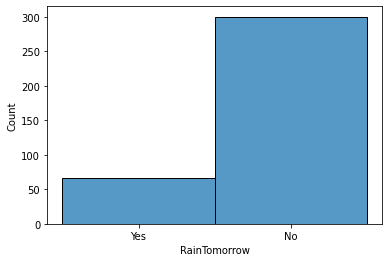

In [39]:
sns.histplot(df2['RainTomorrow'])

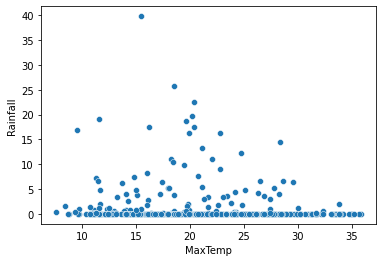

In [40]:
sns.scatterplot(df2['MaxTemp'],df2['Rainfall'])

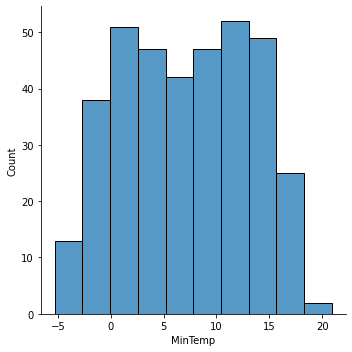

In [41]:
sns.displot(df2['MinTemp'])

In [64]:
df2.dataframeName = 'weather.csv'

In [65]:
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 366 rows and 22 columns


In [66]:
def plotPerColumnDistribution(df2, nGraphShown, nGraphPerRow):
    nunique = df2.nunique()
    df2 = df2[[col for col in df2 if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df2.shape
    columnNames = list(df2)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df2.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

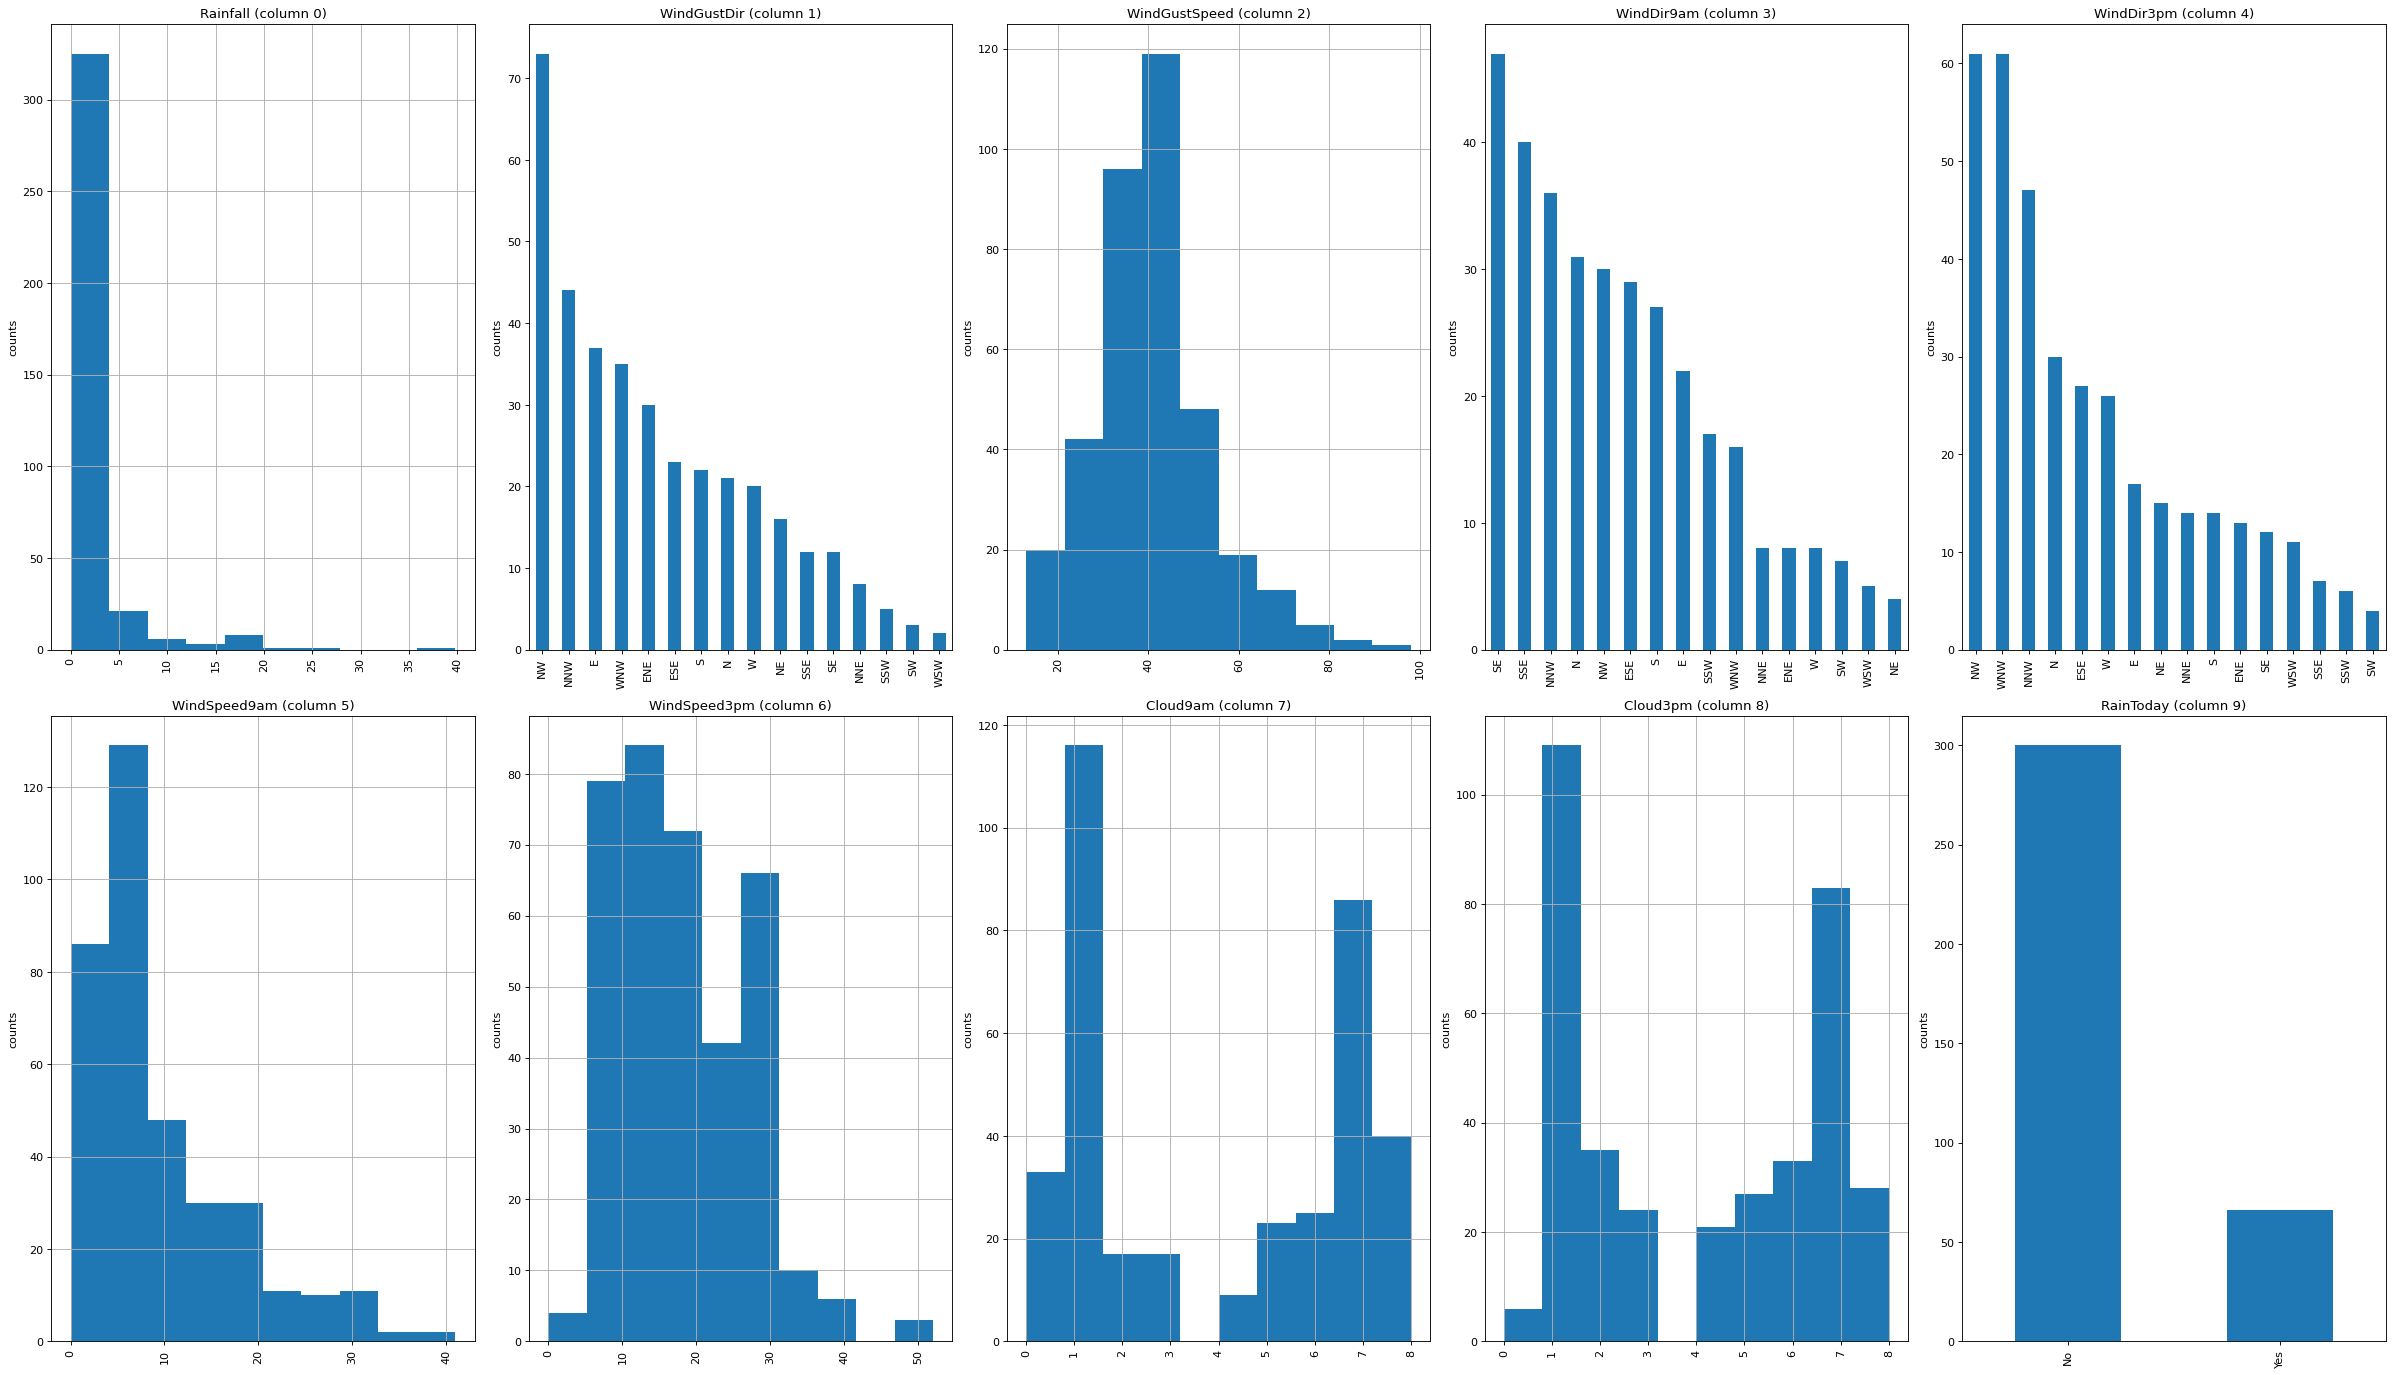

In [67]:
plotPerColumnDistribution(df2, 10, 5)

In [68]:
def plotCorrelationMatrix(df2, graphWidth):
    filename = df2.dataframeName
    df2 = df2.dropna('columns') # drop columns with NaN
    df2 = df2[[col for col in df2 if df2[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df2.shape[1]}) is less than 2')
        return
    corr = df2.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

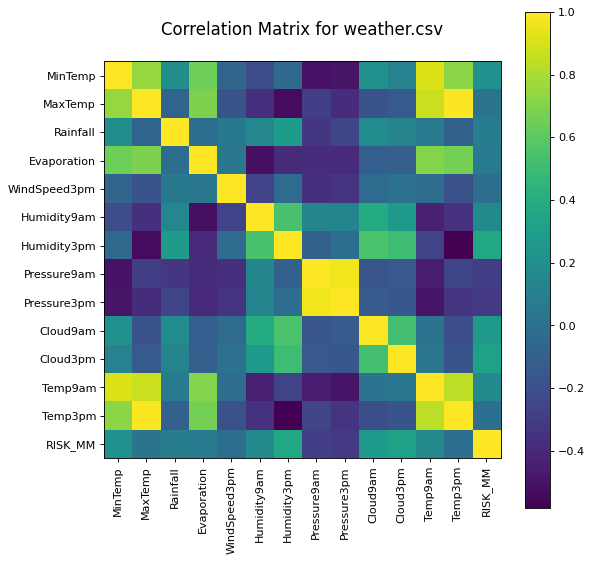

In [69]:
plotCorrelationMatrix(df2, 8)

In [83]:
def plotScatterMatrix(df2, plotSize, textSize):
    df2 = df2.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df2 = df2.dropna('columns')
    df2 = df2[[col for col in df2 if df2[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df2)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df2 = df2[columnNames]
    ax = pd.plotting.scatter_matrix(df2, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df2.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

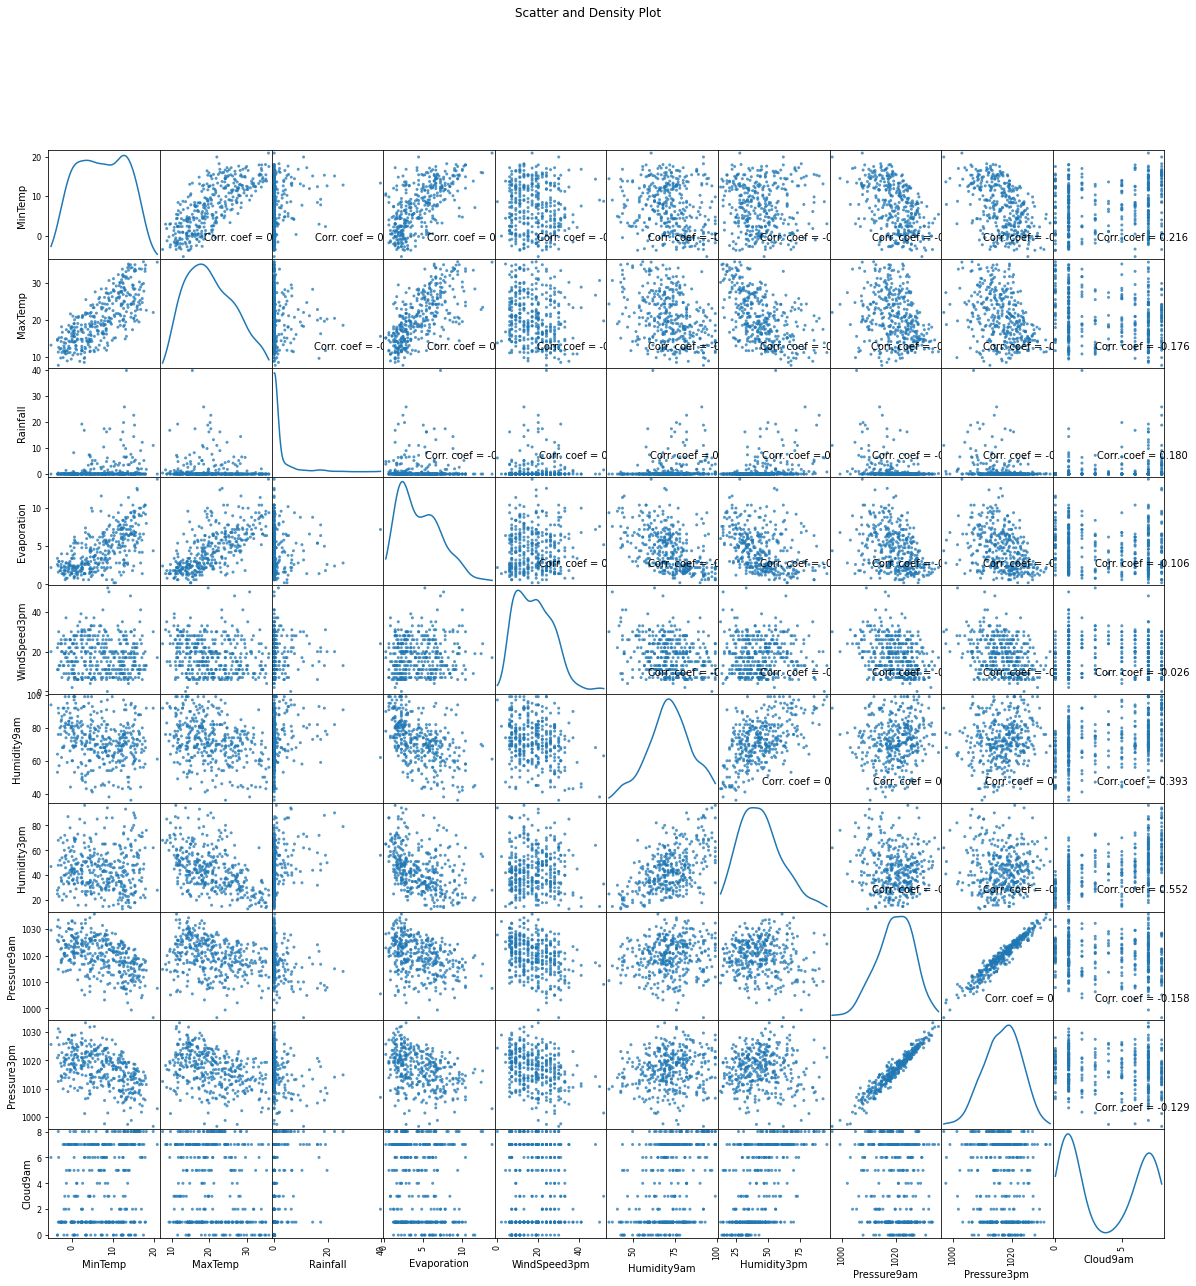

In [84]:
plotScatterMatrix(df2, 20, 10)